<a href="https://colab.research.google.com/github/JulianSilva2001/Neural-Network/blob/main/A%20Simple%20NN%20with%20Manually%20Computed%20Forward%20Path%20and%20Backpropagations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A single dense layer network with manually computed forward path and backpropagations.

Files already downloaded and verified
Files already downloaded and verified
Epoch 1 / 20, Loss: 0.9769410247802734
Epoch 2 / 20, Loss: 0.949838522195816
Epoch 3 / 20, Loss: 0.9360992791652679
Epoch 4 / 20, Loss: 0.9275454885959625
Epoch 5 / 20, Loss: 0.9216049420833587
Epoch 6 / 20, Loss: 0.9172002640962601
Epoch 7 / 20, Loss: 0.913788168489933
Epoch 8 / 20, Loss: 0.9110604096651077
Epoch 9 / 20, Loss: 0.9088308870196342
Epoch 10 / 20, Loss: 0.9069781221151352
Epoch 11 / 20, Loss: 0.9054179024100304
Epoch 12 / 20, Loss: 0.9040907071828842
Epoch 13 / 20, Loss: 0.902952029645443
Epoch 14 / 20, Loss: 0.9019684802293777
Epoch 15 / 20, Loss: 0.9011146731972695
Epoch 16 / 20, Loss: 0.9003694796562195
Epoch 17 / 20, Loss: 0.8997168959975242
Epoch 18 / 20, Loss: 0.8991433779597282
Epoch 19 / 20, Loss: 0.8986378835439682
Epoch 20 / 20, Loss: 0.8981913753151893


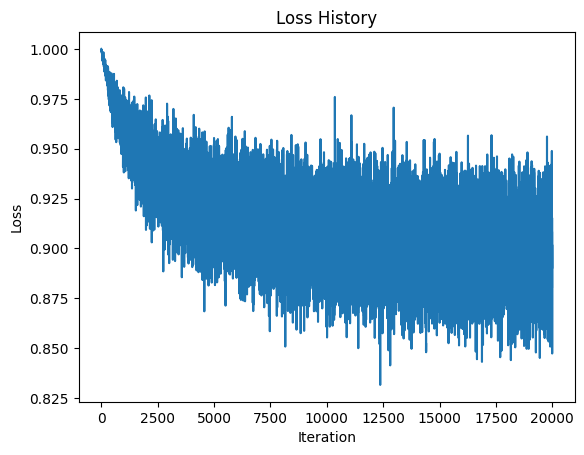

Training accuracy: 32.21%
Test accuracy: 32.38%


In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# 1. Dataloading
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])
batch_size = 50
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# 2. Define Network Parameters
Din = 3 * 32 * 32  # Input size (flattened CIFAR-10 image size)
K = 10  # Output size (number of classes in CIFAR-10)
std = 1e-5
# Initialize weights and biases
w = torch.randn(Din, K) * std  # One layer: directly map input to output
b = torch.zeros(K)

# Hyperparameters
iterations = 20
lr = 2e-6  # Learning rate
lr_decay = 0.9  # Learning rate decay
reg = 0  # Regularization
loss_history = []

# 3. Training Loop
for t in range(iterations):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # Get inputs and labels
        inputs, labels = data
        Ntr = inputs.shape[0]  # Batch size
        x_train = inputs.view(Ntr, -1)  # Flatten input to (Ntr, Din)
        y_train_onehot = nn.functional.one_hot(labels, K).float()  # Convert labels to one-hot

        # Forward pass
        y_pred = x_train.mm(w) + b  # Output layer activation

        # Loss calculation (Mean Squared Error with regularization)
        loss = (1 / Ntr) * torch.sum((y_pred - y_train_onehot) ** 2) + reg * torch.sum(w ** 2)
        loss_history.append(loss.item())
        running_loss += loss.item()

        # Backpropagation
        dy_pred = (2.0 / Ntr) * (y_pred - y_train_onehot)
        dw = x_train.t().mm(dy_pred) + reg * w
        db = dy_pred.sum(dim=0)

        # Parameter update
        w -= lr * dw
        b -= lr * db

    # Print loss for every epoch
    if t % 1 == 0:
        print(f"Epoch {t + 1} / {iterations}, Loss: {running_loss / len(trainloader)}")

    # Learning rate decay
    lr *= lr_decay

# 4. Plotting the Loss History
plt.plot(loss_history)
plt.title("Loss History")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.show()

# 5. Calculate Accuracy on Training Set
correct_train = 0
total_train = 0
with torch.no_grad():
    for data in trainloader:
        inputs, labels = data
        Ntr = inputs.shape[0]
        x_train = inputs.view(Ntr, -1)
        #print(data)
        y_train_onehot = nn.functional.one_hot(labels, K).float()

        # Forward pass
        y_train_pred = x_train.mm(w) + b
        predicted_train = torch.argmax(y_train_pred, dim=1)
        total_train += labels.size(0)
        correct_train += (predicted_train == labels).sum().item()

train_acc = 100 * correct_train / total_train
print(f"Training accuracy: {train_acc:.2f}%")

# 6. Calculate Accuracy on Test Set
correct_test = 0
total_test = 0
with torch.no_grad():
    for data in testloader:
        inputs, labels = data
        Nte = inputs.shape[0]
        x_test = inputs.view(Nte, -1)
        y_test_onehot = nn.functional.one_hot(labels, K).float()

        # Forward pass
        y_test_pred = x_test.mm(w) + b
        predicted_test = torch.argmax(y_test_pred, dim=1)
        total_test += labels.size(0)
        correct_test += (predicted_test == labels).sum().item()

test_acc = 100 * correct_test / total_test
print(f"Test accuracy: {test_acc:.2f}%")



*   A middle layer with 100 nodes and a sigmoid activation is added.
*   Cross-entropy loss is used
*   The nettwork is run for 10 epochs and accuracies are tested.


Files already downloaded and verified
Files already downloaded and verified
Epoch 1 / 10, Loss: 2.2065, Train Accuracy: 19.83%
Epoch 2 / 10, Loss: 2.0123, Train Accuracy: 27.72%
Epoch 3 / 10, Loss: 1.9282, Train Accuracy: 31.23%
Epoch 4 / 10, Loss: 1.8810, Train Accuracy: 33.40%
Epoch 5 / 10, Loss: 1.8448, Train Accuracy: 34.82%
Epoch 6 / 10, Loss: 1.8155, Train Accuracy: 35.87%
Epoch 7 / 10, Loss: 1.7909, Train Accuracy: 36.75%
Epoch 8 / 10, Loss: 1.7704, Train Accuracy: 37.76%
Epoch 9 / 10, Loss: 1.7526, Train Accuracy: 38.50%
Epoch 10 / 10, Loss: 1.7368, Train Accuracy: 39.25%
Test accuracy: 39.36%


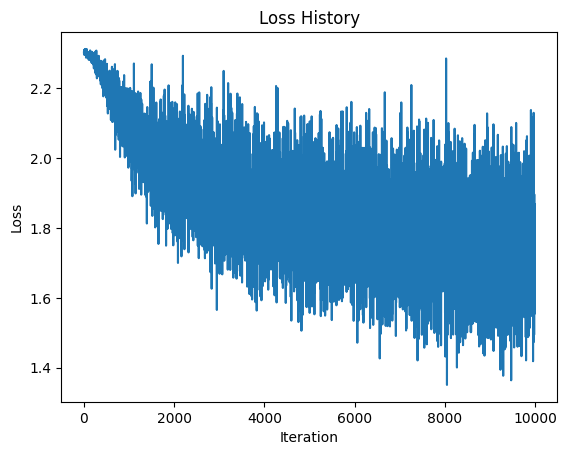

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# 1. Dataloading
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])
batch_size = 50
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# 2. Define Network Parameters
Din = 3 * 32 * 32  # Input size (flattened CIFAR-10 image size)
H = 100            # Hidden layer size
K = 10             # Output size (number of classes in CIFAR-10)

# Initialize weights and biases
w1 = torch.randn(Din, H) * 0.01  # Input-to-hidden layer weights
b1 = torch.zeros(H)              # Hidden layer bias
w2 = torch.randn(H, K) * 0.01    # Hidden-to-output layer weights
b2 = torch.zeros(K)              # Output layer bias

# Set requires_grad for manual gradient calculation
w1.requires_grad = True
b1.requires_grad = True
w2.requires_grad = True
b2.requires_grad = True

# Hyperparameters
iterations = 10
lr = 0.01  # Learning rate
loss_history = []

# Activation and softmax function
sigmoid = nn.Sigmoid()
softmax = nn.Softmax(dim=1)

# 3. Training Loop
for t in range(iterations):
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    for i, data in enumerate(trainloader, 0):
        # Get inputs and labels
        inputs, labels = data
        Ntr = inputs.shape[0]  # Batch size
        x_train = inputs.view(Ntr, -1)  # Flatten input to (Ntr, Din)

        # Forward pass
        hidden = sigmoid(x_train.mm(w1) + b1)  # Hidden layer with sigmoid
        scores = hidden.mm(w2) + b2            # Output layer
        probs = softmax(scores)                # Convert scores to probabilities

        # Calculate loss (cross-entropy) manually
        y_onehot = torch.zeros(Ntr, K)
        y_onehot[torch.arange(Ntr), labels] = 1
        loss = -torch.sum(y_onehot * torch.log(probs)) / Ntr
        loss_history.append(loss.item())
        running_loss += loss.item()

        # Compute gradients
        dscores = probs
        dscores[torch.arange(Ntr), labels] -= 1
        dscores /= Ntr

        dw2 = hidden.t().mm(dscores)
        db2 = dscores.sum(dim=0)

        dhidden = dscores.mm(w2.t()) * hidden * (1 - hidden)  # Sigmoid derivative
        dw1 = x_train.t().mm(dhidden)
        db1 = dhidden.sum(dim=0)

        # Update weights and biases
        with torch.no_grad():
            w1 -= lr * dw1
            b1 -= lr * db1
            w2 -= lr * dw2
            b2 -= lr * db2

        # Calculate training accuracy
        _, predicted = torch.max(scores, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    # Print loss and training accuracy for each epoch
    train_acc = 100 * correct_train / total_train
    print(f"Epoch {t + 1} / {iterations}, Loss: {running_loss / len(trainloader):.4f}, Train Accuracy: {train_acc:.2f}%")

# 4. Calculate Accuracy on Test Set
correct_test = 0
total_test = 0
with torch.no_grad():
    for data in testloader:
        inputs, labels = data
        Nte = inputs.shape[0]
        x_test = inputs.view(Nte, -1)

        # Forward pass
        hidden = sigmoid(x_test.mm(w1) + b1)
        scores = hidden.mm(w2) + b2
        _, predicted_test = torch.max(scores, 1)

        total_test += labels.size(0)
        correct_test += (predicted_test == labels).sum().item()

test_acc = 100 * correct_test / total_test
print(f"Test accuracy: {test_acc:.2f}%")

# 5. Plotting the Loss History
plt.plot(loss_history)
plt.title("Loss History")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.show()
